 # Import Dataset

In [1]:
import pandas as pd
import numpy as np

from cmdstanpy import CmdStanModel
import arviz as az

import matplotlib.pyplot as plt

In [2]:
with open("data/Fecondità.csv", "rb") as f:
    dataset=pd.read_csv(f)

dataset = dataset.sort_values(by=['Territorio', 'TIME']) # the proximity matrix is built with the prov in alphabetic order

dataset

,Territorio,TIME,età.media.delle.madri.al.parto,età.media.dei.padri.alla.nascita.del.figlio,tasso.di.fecondità.totale,tasso.di.inattività.dei.maschi,tasso.di.inattività.delle.femmine,tasso.di.inattività.totale,tasso.di.occupazione.dei.maschi,tasso.di.occupazione.delle.femmine,tasso.di.occupazione.totale
930,Agrigento,2011,30.94,34.80,1.37,42.911800,75.561168,59.924924,47.392418,19.828757,33.029603
931,Agrigento,2012,30.73,34.57,1.35,43.934839,74.366121,59.780301,45.282895,20.513632,32.385627
932,Agrigento,2013,31.09,34.78,1.27,46.361107,73.567265,60.518499,43.469198,19.889053,31.198656
933,Agrigento,2014,30.99,35.06,1.33,47.098738,72.427712,60.272133,39.673492,20.296449,29.595648
934,Agrigento,2015,31.14,34.97,1.27,45.169256,75.916130,61.148536,40.057236,18.153835,28.674135
...,...,...,...,...,...,...,...,...,...,...,...
625,Viterbo,2016,31.99,35.76,1.23,39.518267,60.635768,50.408778,52.769263,32.263986,42.194134
626,Viterbo,2017,32.17,35.73,1.16,41.158020,61.241767,51.511845,51.680541,33.283508,42.195912
627,Viterbo,2018,32.05,35.64,1.20,42.945825,61.820030,52.659989,50.508888,33.458828,41.733539
628,Viterbo,2019,31.97,35.51,1.11,44.935350,63.118101,54.287825,49.777042,32.974065,41.133933


0.015125712353150588
1.3187169811320756
(106, 10)


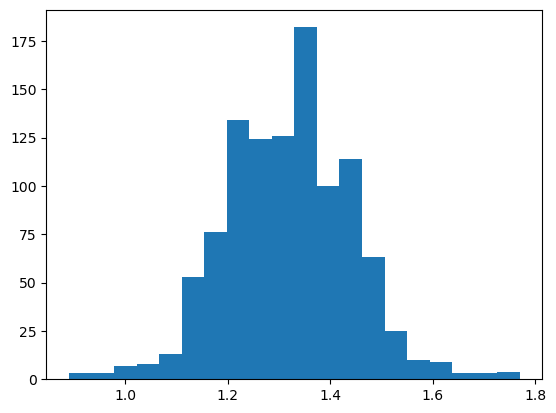

In [3]:
Y=np.array(dataset["tasso.di.fecondità.totale"])

print(np.var(Y))
print(np.mean(Y))


y = []
y_tmp = np.zeros(10)
for prov in np.unique(dataset["Territorio"]):
    data_prov = dataset[dataset["Territorio"] == prov]
    y_tmp = np.array(data_prov["tasso.di.fecondità.totale"])
    y.append(y_tmp)
y = np.array(y)
# print(y)
print(y.shape)
plt.hist(Y,bins=20)    
plt.show()

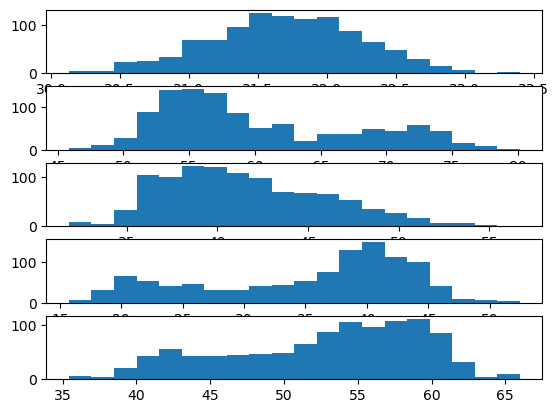

In [4]:
P = 5
X_list = []
# mega matrix with the covariates, da normalizzare forse?
X_list.append(np.array(dataset["età.media.delle.madri.al.parto"]))
# X_list.append(np.array(dataset["età.media.dei.padri.alla.nascita.del.figlio"]))
X_list.append(np.array(dataset["tasso.di.inattività.delle.femmine"]))
X_list.append(np.array(dataset["tasso.di.inattività.dei.maschi"]))
# X_list.append(np.array(dataset["tasso.di.inattività.totale"]))
X_list.append(np.array(dataset["tasso.di.occupazione.delle.femmine"]))
X_list.append(np.array(dataset["tasso.di.occupazione.dei.maschi"]))
# X_list.append(np.array(dataset["tasso.di.occupazione.totale"]))
# da valutare se vanno standardizzate
fig, axs = plt.subplots(P)

for i in range(P):
    axs[i].hist(X_list[i],bins=20)

plt.show()

In [5]:
#Standardization on X
for i in range(P):
    X_list[i] = (X_list[i]-np.mean(X_list[i])) / np.sqrt(np.var(X_list[i]))


#Standardization on Y
y= (y-np.mean(y))/np.sqrt(np.var(y))

In [6]:
X=np.ones((1060,P+1))

for i in range(P):
    X[:,i+1] = X_list[i]

X_r = np.reshape(X,(106,10,P+1))
print(X_r)
X_r.shape

[[[ 1.         -1.38733389  2.05144371  0.30656436 -1.81625192
   -0.81711788]
  [ 1.         -1.77061906  1.89211824  0.5393075  -1.7347706
   -1.14081907]
  [ 1.         -1.11355877  1.78561354  1.09128765 -1.80907835
   -1.41912648]
  ...
  [ 1.         -0.18272337  1.69594042  0.33345848 -2.07454665
   -1.43529694]
  [ 1.         -0.29223342  1.66432349  0.72523738 -1.76815191
   -1.50014603]
  [ 1.         -0.03670997  1.78846129  1.48582068 -1.84282015
   -1.66422814]]

 [[ 1.         -1.64285734 -0.34660173  0.24677987  0.51836657
    0.15248205]
  [ 1.         -1.27782385 -0.71508174 -0.21575525  0.60314497
    0.12708264]
  [ 1.         -0.73027361 -0.41062779  0.02698863  0.15451856
    0.059098  ]
  ...
  [ 1.         -0.20097504 -0.48714728 -0.31928696  0.46379505
    0.19264358]
  [ 1.          0.03629673 -0.3382982  -0.29482666  0.27341734
    0.41537872]
  [ 1.          0.10930342 -0.19435256  0.16948911  0.17544987
    0.04594432]]

 [[ 1.         -0.82153198 -0.8285012

(106, 10, 6)

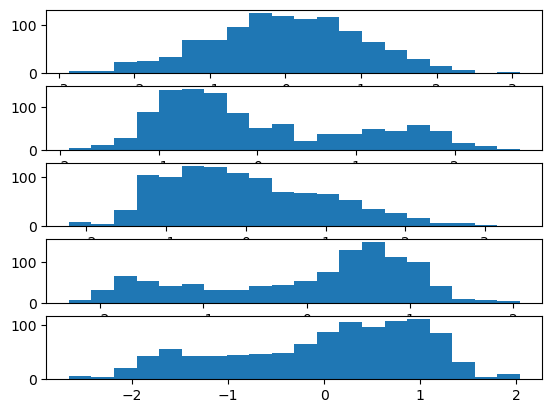

In [7]:
fig, axs = plt.subplots(P)

for i in range(P):
    axs[i].hist(X_list[i],bins=20)

plt.show()

In [8]:
I = 106
T = 10
H = 10

new_X = np.zeros((I,T,P+1))
new_Y = np.zeros((I,T))

for i in range(I):
    for t in range(T):
        new_X[i,t,:] = X_r[i,(10//T)*t,:]
        new_Y[i,t]   = y[i,(10//T)*t]

X_r = new_X
y = new_Y

# Prepare data for model

In [9]:
with open("data/Proximity_matrix.csv", "rb") as f:
    W_raw=pd.read_csv(f)
    
W_raw=np.matrix(W_raw)

for i in range(I):
    W_raw[i,i] = 0

W_raw=np.matrix(W_raw)
Wt = W_raw.transpose()
(Wt == W_raw).all()

# compute Qinv
one_vector = np.ones(shape = (I,1))
B = np.matmul(W_raw , one_vector)  
A =  np.diagflat(np.array(B))
W_intermedia = A - W_raw


rho = 0.95
Q = rho * W_intermedia  + (1-rho) * np.eye(I)
Qinv = np.linalg.inv(Q)
# Qinv.shape
W_intermedia.shape

#Qinv must be positive definite
for i in range(I):
    for j in range(I):
        Qinv[j,i] = Qinv[i,j]

Qinv=np.matrix(Qinv)
Qinvt = Qinv.transpose()
print((Qinv == Qinvt).all())

True


# Prior predictive check 

In [10]:
# from tensorflow_probability.substrates import numpy as tfp
# tfd = tfp.distributions
# np.random.seed()

# # weight construction
# weight = np.zeros(H)
# alpha=np.random.gamma(a_alpha,b_alpha)
# v = np.zeros(H)
# v[0] = np.random.beta(a = 1,b = alpha)
# weight[0] = v[0]
# for h in range(1,H-1):
#     v[h] = np.random.beta(a = 1,b = alpha)
#     cumprod = np.cumprod(1 - v[0:h])[h-1]
#     weight[h] = v[h]*cumprod
    
# weight = weight/ np.sum(weight)
# # to be chekcked

# # betas construction 
# betas = []
# beta = np.zeros(P+1)
# for h in range(H):
#     beta = np.array(np.random.multivariate_normal(mean=mu_0, cov = sigma_0*np.eye(P+1)))
#     betas.append(beta)
                                         
# betas = np.array(betas)
                                         
# # tau2
# tau2 = tfd.InverseGamma(concentration = a_tau2 , scale = b_tau2).sample()
# print(tau2)

# xi=np.random.beta(a=a_xi,b=b_xi)
# # random effects construction 
# W=np.zeros((I,T))
# diag_matrix_xis= xi*np.eye(I) #diag(xis)                                          
# W[:,0]=np.random.multivariate_normal(mean=np.zeros(I),cov=tau2*Qinv)
# for t in range(T-1):
#     W[:,t+1]=np.random.multivariate_normal(mean=np.matmul(diag_matrix_xis,W[:,t]), cov=tau2*Qinv)                                        
                    
# # sigma
# sigma2 = tfd.InverseGamma(concentration = a_sigma2 , scale = b_sigma2).sample()                                     

# # y construction 
# y_p = np.zeros((I*T))                                   
# for i in range(I):                                   
#     for h in range(H):
#         y_p[i*T:(i+1)*T] += weight[h]*np.random.multivariate_normal(mean=np.matmul(X_r[i],betas[h]) + W[i,:], cov = sigma2*np.eye(T))
# fig, axs = plt.subplots(2)                                         
# axs[0].hist(y_p,bins=25)
# axs[1].hist(y.reshape(I*T),bins=25)   # lo voglio simile all'istogramma sopra 



In [11]:
mu_0_mean = 0*np.ones(P+1)
mu_0_var = 9
a_sigma2_0 = 3
b_sigma2_0 = 2
mu_w_1 = np.zeros(I)
a_alpha = 3
b_alpha = 3
a_tau2 = 3
b_tau2 = 0.5
a_sigma2 = 3
b_sigma2 = 1
rho = 0.95
mu_xi = 0
sigma2_xi = 4

data = {
    "I": I,
    "T": T,
    "P": P,
    "H": H,
    "y": y,
    "X": X_r,
    "mu_0_mean": mu_0_mean,
    "mu_0_var": mu_0_var,
    "a_sigma2_0": a_sigma2_0,
    "b_sigma2_0": b_sigma2_0,
    "mu_w_1": mu_w_1,
    "a_alpha": a_alpha,
    "b_alpha": b_alpha,
    "a_tau2": a_tau2,
    "b_tau2": b_tau2,
    "a_sigma2": a_sigma2,
    "b_sigma2": b_sigma2,
    "rho": rho,
    "mu_xi": mu_xi,
    "sigma2_xi": sigma2_xi,
    "inv_Q": Qinv
}

# Model

In [12]:
dp_mix_stan = """
data
{
    int I; // number of areal locations
    int T; // number of time steps
    int P; // number of covariates
    int H; // truncation of stick breaking construction dp
    
    array[I] vector[T] y; // value of interest
    array[I] matrix[T,P+1] X; // covariates matrices for each province
      
    // hyperpar vector of regressors
    vector[P+1] mu_0_mean;
    real        mu_0_var;
    real        a_sigma2_0;
    real        b_sigma2_0;
    
    // mean of w_1 (random effect for every province at time 1)
    vector[I] mu_w_1;
    
    // alpha
    real a_alpha;
    real b_alpha;
    
    // tau^2
    real a_tau2;
    real b_tau2;
    
    // sigma^2
    real a_sigma2;
    real b_sigma2;
    
    // rho 
    real rho;
    
    //xis
    real mu_xi;
    real sigma2_xi;

    // Qinv
    matrix[I,I] inv_Q;
}

transformed data {
    matrix[I, I] L;
    L = cholesky_decompose(inv_Q);
    
    real mu_0_sd;
    mu_0_sd = sqrt(mu_0_var);
    
    real sigma_xi;
    sigma_xi = sqrt(sigma2_xi);
}

parameters
{
    real<lower=0> alpha;
    real<lower=0> sigma2; 
    real<lower=0> tau2;
    
    vector[P+1]   mu_0;
    real<lower=0> sigma2_0;
    
    // autoregressive coefficient construction
    real xi;
    
    // betas for the mixture of the dirichlet process
    array[H] vector[P+1] betas; 

    // for the construction of the dirichlet process
    vector<lower=0,upper=1>[H-1] vs;
    
    // for the random effect construction 
    array[T] vector[I] w_raw;
}

transformed parameters
{   
    // weights stick breaking construction
    simplex[H] omegas; 
    
    // sbc stuff
    vector[H-1] cumprod_one_mv;    
    cumprod_one_mv = exp(cumulative_sum(log1m(vs)));
    
    omegas[1] = vs[1];
    omegas[2:(H-1)] = vs[2:(H-1)] .* cumprod_one_mv[1:(H-2)];
    omegas[H] = cumprod_one_mv[H-1];
    
    // random effects tmp
    matrix[I,T]                ws_tmp;
    
    ws_tmp[1:I,1] =  mu_w_1 + L*w_raw[1];
    
    for (t in 2:T)
        ws_tmp[1:I,t] = ws_tmp[1:I,t-1]*xi + L*w_raw[t]; 
    
    matrix[T,I]   ws = (ws_tmp)'; //otherwise I have to transpose in the for loop at each iteration
    
    // Stan wants std
    real sigma   = sqrt(sigma2);
    real tau     = sqrt(tau2);
    real sigma_0 = sqrt(sigma2_0);
}

model
{
    alpha    ~ gamma(a_alpha,b_alpha);
    sigma2   ~ inv_gamma(a_sigma2,b_sigma2);
    tau2     ~ inv_gamma(a_tau2,b_tau2);
    mu_0     ~ normal(mu_0_mean, mu_0_sd);
    sigma2_0 ~ inv_gamma(a_sigma2_0, b_sigma2_0);
    vs       ~ beta(1,alpha); 
    xi       ~ normal(mu_xi, sigma_xi);
    
    w_raw[1] ~ normal(0, tau); 
    
    for (t in 2:T)
        w_raw[t] ~ normal(0, tau);
    
    for (h in 1:H)
        betas[h] ~ normal(mu_0, sigma_0);
    
    vector[H] log_probs;
    
    for (i in 1:I) {
        
        for (h in 1:H) 
    
            log_probs[h] = log(omegas[h]) + normal_lpdf(y[i] | X[i]*betas[h] + ws[1:T,i], sigma);
        
        target += log_sum_exp(log_probs);
    }
}

generated quantities 
{   
    // vector of cluster allocations
    vector[I] s;
    
    // log likelihood for each areal location 
    vector[I] log_lik;
    
    array[I] vector[H] log_probs;
    
    for (i in 1:I) 
    {
        for (h in 1:H) 
            log_probs[i,h] = log(omegas[h]) + normal_lpdf(y[i] | X[i]*betas[h] + ws[1:T,i], sigma);
        
        s[i] = categorical_rng(softmax(log_probs[i]));
        log_lik[i] = log_sum_exp(log_probs[i]);
    }
    
        
}
"""
stan_file = "stan_files/model.stan"

with open(stan_file, "w") as fp:
    fp.write(dp_mix_stan)
    
model = CmdStanModel(stan_file=stan_file)

15:31:12 - cmdstanpy - INFO - compiling stan file /home/daan/bayesian-project/stan_files/model.stan to exe file /home/daan/bayesian-project/stan_files/model
15:31:50 - cmdstanpy - INFO - compiled model executable: /home/daan/bayesian-project/stan_files/model


In [13]:
fit = model.sample(data
                    , seed = [784,215,8955,9841]
#                     , iter_warmup = 10000
#                     , iter_sampling = 10000
#                     , adapt_init_phase = 500
#                     , adapt_metric_window = 1500
#                     , adapt_step_size = 1500
#                     , adapt_delta=0.9
#                     , step_size = 0.5
#                     , max_treedepth = 10
#                     , show_console = True
                   )

15:31:50 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

15:59:36 - cmdstanpy - INFO - CmdStan done processing.
15:59:36 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/daan/bayesian-project/stan_files/model.stan', line 116, column 4 to column 30)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/daan/bayesian-project/stan_files/model.stan', line 116, column 4 to column 30)
Consider re-running with show_console=True if the above output is unclear!


In [14]:
fit_az = az.from_cmdstanpy(fit)

# Model Saving

In [23]:
s = (fit.s).astype(int)

np.savetxt("outputs/posterior_s.csv", s, delimiter=",")
s.shape

(4000, 106)

In [24]:
np.savetxt("outputs/posterior_xi.csv", fit.xi, delimiter=",")
np.savetxt("outputs/posterior_alpha.csv", fit.alpha, delimiter=",")

# Posterior inference

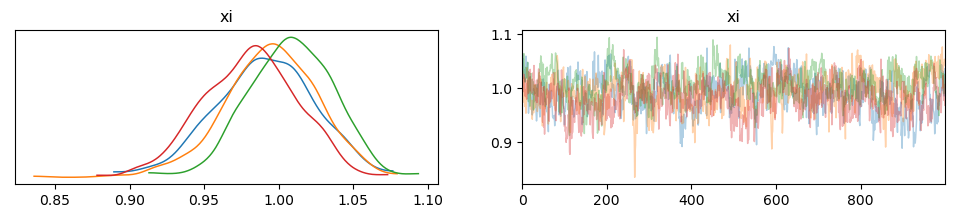

In [18]:
az.plot_trace(fit_az,var_names=["xi"],
              compact = False
             )
plt.show()

In [19]:
# posterior credible interval per i beta ma se li vuoi anche per i random effects
hdis = az.hdi(fit, var_names=["betas"]).betas.values
hdis

array([[[-0.456806 ,  0.809496 ],
        [-0.494752 , -0.115636 ],
        [-0.357255 ,  0.534332 ],
        [-0.394122 ,  0.281867 ],
        [-0.185318 ,  0.730948 ],
        [-0.235024 ,  0.331895 ]],

       [[-0.574731 ,  0.731586 ],
        [-0.407598 , -0.160805 ],
        [-0.198605 ,  0.54404  ],
        [-0.213418 ,  0.2752   ],
        [-0.0551976,  0.739546 ],
        [-0.190554 ,  0.29542  ]],

       [[-0.745298 ,  1.23964  ],
        [-0.59913  , -0.113403 ],
        [-0.514648 ,  0.732603 ],
        [-0.710327 ,  0.163676 ],
        [-0.39738  ,  0.872295 ],
        [-0.649892 ,  0.450891 ]],

       [[-0.893989 ,  1.20149  ],
        [-0.642619 , -0.0388253],
        [-0.466869 ,  0.832494 ],
        [-0.797094 ,  0.30026  ],
        [-0.555583 ,  0.88609  ],
        [-0.781636 ,  0.490349 ]],

       [[-0.92538  ,  1.12883  ],
        [-0.731569 ,  0.680496 ],
        [-0.684781 ,  0.91271  ],
        [-1.05797  ,  0.341827 ],
        [-0.613567 ,  1.04544  ],
      

In [20]:
# computation of WAIC 
az.waic(fit, scale="negative_log")

/home/daan/.local/lib/python3.10/site-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


Computed from 4000 posterior samples and 106 observations log-likelihood matrix.

              Estimate       SE
deviance_waic   353.53    64.31
p_waic          282.42        -

There has been a warning during the calculation. Please check the results.

In [21]:
#computation of LOO
az.loo(fit, scale="negative_log")

/home/daan/.local/lib/python3.10/site-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


Computed from 4000 posterior samples and 106 observations log-likelihood matrix.

         Estimate       SE
elpd_loo  -215.07    32.41
p_loo      320.72        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)        0    0.0%
 (0.5, 0.7]   (ok)          8    7.5%
   (0.7, 1]   (bad)        62   58.5%
   (1, Inf)   (very bad)   36   34.0%